In [1]:
from core.TrajectoryDF import NumPandasTraj as TrajDF
from features.spatial_features import SpatialFeatures as spatial
from features.temporal_features import TemporalFeatures as temporal
import matplotlib.pyplot as plt
from preprocessing.interpolation import Interpolation as ip
from preprocessing.filters import Filters as filt
from utilities.conversions import Conversions as con
from preprocessing.helpers import Helpers as help

import utilities.constants as const
import pandas as pd
from scipy.interpolate import CubicSpline, interp2d
import numpy as np

In [2]:
%%time

# atlantic = pd.read_csv('./data/atlantic.csv')
# atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
# def convert_to_datetime(row):
#         this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
#         this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
#         return '{} {}'.format(this_date, this_time)
# atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
# sample = TrajDF(atlantic,
#                 latitude='Latitude',
#                 longitude='Longitude',
#                 datetime='DateTime',
#                 traj_id='ID',
#                 rest_of_columns=[])
gulls = pd.read_csv('./data/gulls.csv')
sample = TrajDF(gulls,
                latitude='location-lat',
                longitude='location-long',
                datetime='timestamp',
                traj_id='tag-local-identifier',
                rest_of_columns=[])
# rf = pd.read_csv('./data/geolife_sample.csv')
# sample = TrajDF(rf, 'lat', 'lon', 'datetime', 'id')

CPU times: user 320 ms, sys: 17.1 ms, total: 337 ms
Wall time: 336 ms


In [3]:
small = sample.reset_index().loc[sample.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
a = small.reset_index()[const.DateTime].diff().dt.total_seconds()
print((a > 3600*4).value_counts())


True     1501
False     469
Name: DateTime, dtype: int64


In [4]:
%%time

small_ip_rw = help._random_walk_help(small.reset_index(drop=True).set_index([const.DateTime]), '91732', 3600*4)
print(f"Original Length: {len(small)}")
print(f"Interpolated Length: {len(small_ip_rw)}")

Original Length: 1970
Interpolated Length: 3471
CPU times: user 3.95 s, sys: 5.22 ms, total: 3.96 s
Wall time: 3.96 s


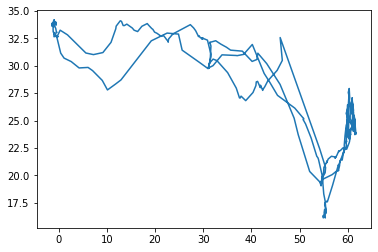

In [5]:
plt.plot(small[const.LAT], small[const.LONG])


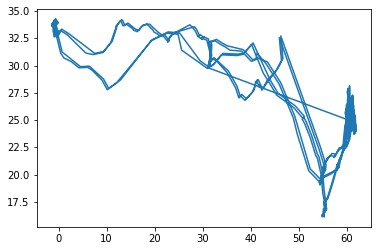

In [6]:
plt.plot(small_ip_rw[const.LAT], small_ip_rw[const.LONG])


In [7]:
%%time

ip_rw = ip.interpolate_position(sample,
                                3600*4,
                                'random-walk')
print(f"Original Length: {len(sample)}")
print(f"Interpolated Length: {len(ip_rw)}")

Process Process-13:
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/multiprocessing/pool.py", line 51, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/home/yjharanwala/Desktop/NumMobility/preprocessing/helpers.py", line 209, in _random_walk_help
    calc_a = d_mean.rvs()
  File "/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py", line 456, in rvs
    return self.dist.rvs(*self.args, **kwds)
  File "/home/yjharanwala/anaconda3/envs/PreprocessingLibrary/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py", line 979, in rvs
    raise ValueError("Domain error in arguments.")
ValueError: Domain error in arguments.
"""

Original Length: 89869
Interpolated Length: 157731
CPU times: user 315 ms, sys: 116 ms, total: 431 ms
Wall time: 49.7 s


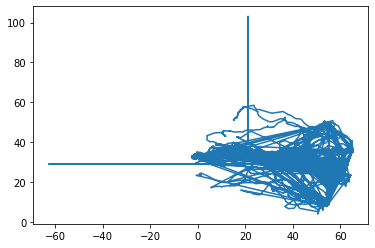

In [8]:
plt.plot(sample[const.LAT], sample[const.LONG])

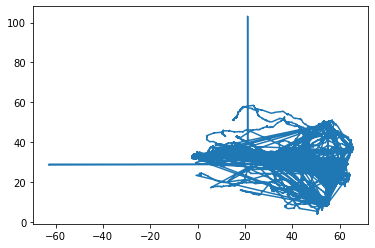

In [9]:
plt.plot(ip_rw[const.LAT], ip_rw[const.LONG])